In [64]:
from __future__ import division
import sys
import os
import numpy as np
from matplotlib import pyplot as plt

In [79]:

def Plot_rate(data_directory, target_files = None):

    raw_data_dictionary = {}

    ## Can get data files from the directory (all files will be used)
    ## or from a file supplied with names of the data files to be used.

    if isinstance(target_files, str):
        data_files = [i.strip() for i in open(target_files, 'r').readlines()]

    elif target_files == None:
        data_files = os.listdir(data_directory)

    ## Get raw data from all the files in the given directory

    for dat_file_name in data_files:
        if "logfile_nonrec_region" in dat_file_name:
            mut_rate = dat_file_name.split(".")[2]
            recomb_rate = dat_file_name.split(".")[3]
            area = dat_file_name.split(".")[4]
            PopN = dat_file_name.split(".")[5]
            Rep = dat_file_name.split(".")[6]

            key = ".".join([mut_rate, recomb_rate, area, PopN])

            if key not in raw_data_dictionary:
                raw_data_dictionary[key] = {}

            dat_file = open("%s/%s" % (data_directory,dat_file_name), 'r').readlines()[1:]

            for line in dat_file:
                gen = int(line.split()[0])
                size = int(line.split()[1])

                if gen not in raw_data_dictionary[key]:
                    raw_data_dictionary[key][gen] = []

                raw_data_dictionary[key][gen].append(size)  
    
    ## Now average over the iterations for each parameter set
    
    Avgd_data_dict = {}

    for param_set in raw_data_dictionary:
        Avgd_data_dict[param_set] = {}

        for gen in raw_data_dictionary[param_set]:
            Avgd_data_dict[param_set][gen] = np.mean(raw_data_dictionary[param_set][gen])
    
    
    ## Make some plots
    
    plt.figure(figsize = (20,7*len(Avgd_data_dict)))
   

    subplot_index = 1
    colours = ["purple"]

    for key in Avgd_data_dict:

        plt.subplot(len(Avgd_data_dict),1,subplot_index)

        gens = sorted(Avgd_data_dict[key].keys())

        x = []
        y = []

        for gen in gens:

            x.append(gen)
            y.append(Avgd_data_dict[key][gen])

        plt.plot(x,y, c = colours[0])
        plt.xlabel("Generation")
        plt.ylabel("Size (Bp) of non-recombging region around the SD")
        plt.title("Mutation rate = %s,  Recomb rate = %s,  Area of effect = %s,  Population size = %s" % 
                  (key.split(".")[0], key.split(".")[1], key.split(".")[2], key.split(".")[3]))
        subplot_index += 1


    outplot_path = "%s/%s" % (data_directory, "Non_recomb_expansion_rates.pdf")
    #plt.savefig(outplot_path)
    plt.show()
    
    print "Done! Your plot is here: %s" % outplot_path
    

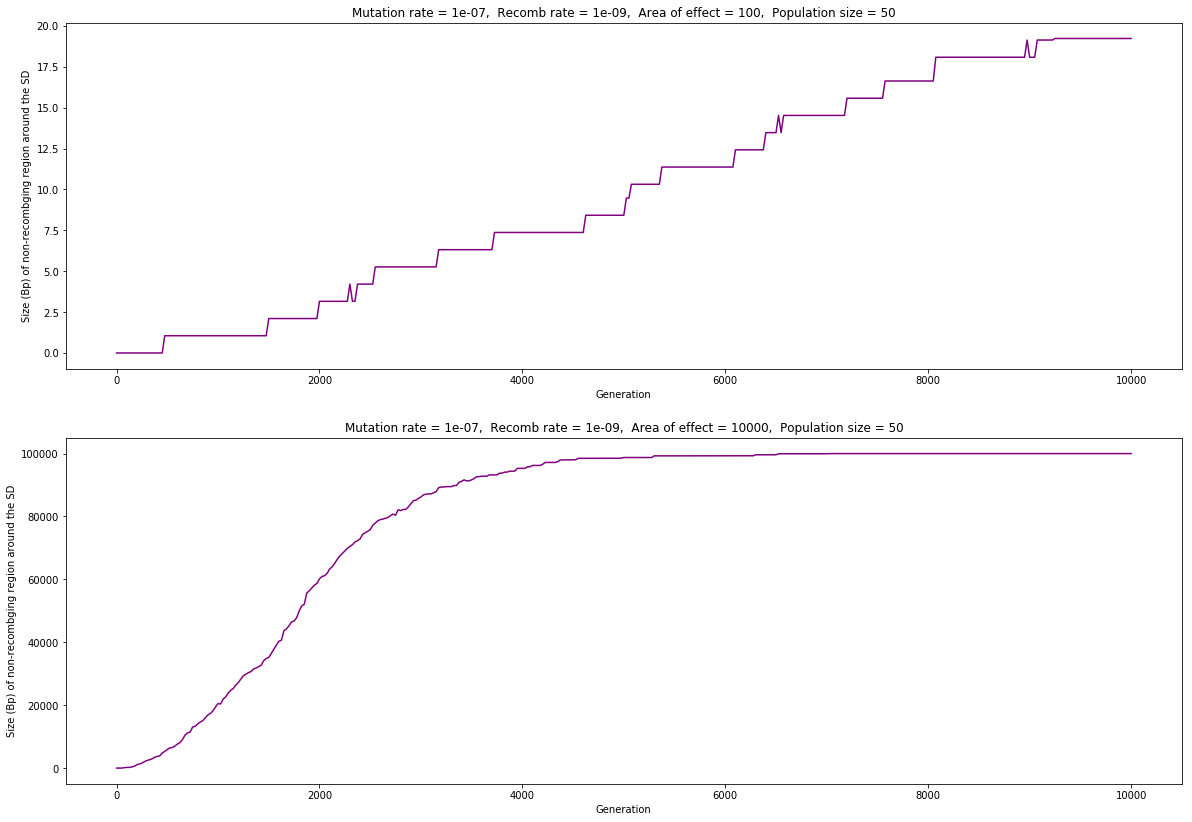

Done! Your plot is here: /home/djeffrie/Data/SexRecEvo/sexrecevo/Plotting/expansion_rates_examples/Non_recomb_expansion_rates.pdf


In [80]:
test_data_directory = "/home/djeffrie/Data/SexRecEvo/sexrecevo/Plotting/expansion_rates_examples"
test_target_files = "/home/djeffrie/Data/SexRecEvo/sexrecevo/Plotting/expansion_rates_examples/test.temp"

data_dict = Plot_rate(test_data_directory , test_target_files)

In [ ]:
## CLINE interface

if len(sys.argv) < 2:
    sys.exit("Not enough arguments")
    print Plot_rate.__docstring__

elif len(sys.argv) == 2:
    data_directory_cline = sys.argv[1]

    Plot_rate(data_directory_cline)

elif len(sys.argv) == 3:
    data_directory_cline = sys.argv[1]
    target_files_cline = sys.argv[2]

    Plot_rate(data_directory_cline, target_files_cline)


## Plotting rates for multiple parameter combinations

So we now have multiple simulations for many parameter combinations. . . . the challenge is to find a way to plot the rate of expansion for all of these. . . . 

I think we have to just accept that we will want to see all combinations, just to check whats going on. So to that end, I will start by just plotting a huge matrix of parameter combinations. 

### Parameters tested:

Mutation rate: [1e-05, 1e-06]  
Recombinatin rate: [1e-04, 1e-05, 1e-06, 1e-09]
Recombination threshold: [0.95, 0.9, 0.805]
Area of mutational effect:[100, 50, 20]
Population size:[100, 50, 20]

The results of these simulations are included in a single file which gives the total_growth_sites and rate_sites_per_generation. So I can simply plot these as violin plots for example (where the data are the iterations for each param combination). So there will be 2 violins for each param combination. Axes may be an issue . . . lets see.


#### Step 1. Get data into a dict

In [65]:
growth_rates = open("/home/djeffrie/Data/SexRecEvo/sexrecevo/growth_rate_report.txt", 'r').readlines()

rates_dict = {}

params_dict = {}
params_dict["m"] = []
params_dict["r"] = []
params_dict["rws"] = []
params_dict["min_ident"] = []
params_dict["N"] = []


for line in growth_rates[1:]:
    m = float(line.split()[0])
    r = float(line.split()[1])
    rws = int(line.split()[2])
    min_ident = float(line.split()[3])
    N = int(line.split()[4])
    gens = int(line.split()[5])
    total_growth_sites = int(line.split()[6])
    rate = float(line.split()[7])
    
    combo = "%s_%s_%s_%s_%s" % (m, r, rws, min_ident, N)
    
    ## get the data
    
    if combo not in rates_dict:
        rates_dict[combo] = {}
        rates_dict[combo]["gens"] = []
        rates_dict[combo]["total_growth_sites"] = []
        rates_dict[combo]["rate"] = []
    
    
    rates_dict[combo]["gens"].append(gens)
    rates_dict[combo]["total_growth_sites"].append(total_growth_sites)
    rates_dict[combo]["rate"].append(rate)    
    
    ## get the params for setting the plot layout later
    
    if m not in params_dict["m"]:
        params_dict["m"].append(m)
    if r not in params_dict["r"]:
        params_dict["r"].append(r)
    if rws not in params_dict["rws"]:
        params_dict["rws"].append(rws)
    if min_ident not in params_dict["min_ident"]:
        params_dict["min_ident"].append(min_ident)
    if N not in params_dict["N"]:
        params_dict["N"].append(N)
        
    ## sort the parameters
    for i in params_dict:
        params_dict[i] = sorted(params_dict[i])
        
    
    

#### Step 2. Ok now to set the layout of the plot....

This is quite complicated - I can only compare 2 variables in a matrix of NxN. Unless I start nesting panels, which could be a bit of a nightmare. 

So lets start by plotting a matrix for r vs m for just the lowest value of all the other parameters.

In [68]:
params_dict

{'N': [20, 50, 100],
 'm': [1e-06, 1e-05],
 'min_ident': [0.805, 0.9, 0.95],
 'r': [1e-09, 1e-06, 1e-05, 0.0001],
 'rws': [20, 50, 100]}

In [73]:
import matplotlib.gridspec as gridspec

#stat_to_plot = "total_growth_sites"
stat_to_plot = "rate"


N_m_vals = len(params_dict["m"])
N_r_vals = len(params_dict["r"])
N_rws_vals = len(params_dict["rws"])
N_min_ident_vals = len(params_dict["min_ident"])
N_N_vals = len(params_dict["N"])

default_to_plot = 2

rws_default = params_dict["rws"][default_to_plot]
min_ident_default = params_dict["min_ident"][default_to_plot]
N_default = params_dict["N"][default_to_plot]

### get combinations of the 2 main parameters to plot

combos = [(x,y) for x in params_dict["m"] for y in params_dict["r"]]

fig = plt.figure(figsize = (60,20))

outer_grid = gridspec.GridSpec(1, N_rws_vals+N_min_ident_vals+N_N_vals, wspace= 0.4, hspace=0.4)  ## set major grid which separates parameters

outer_index = 0

for param in ["rws", "min_ident","N"]:
    
    
    for param_val in params_dict[param]:
        
        if param == "rws":
            rws_val = param_val
            min_ident_val = min_ident_default
            N_val = N_default
        if param == "min_ident":
            rws_val = rws_default
            min_ident_val = param_val
            N_val = N_default
        if param == "N":
            rws_val = rws_default
            min_ident_val = min_ident_default
            N_val = param_val

        inner = gridspec.GridSpecFromSubplotSpec(N_m_vals, 1,
                        subplot_spec=outer_grid[outer_index], wspace=0.1, hspace=0.1)

        inner_index = 0
        for m_val in params_dict["m"]:

            ax = plt.Subplot(fig, inner[inner_index])

            m_position = 1

            for r_val in params_dict["r"]:

                full_combo = "%s_%s_%s_%s_%s" % (m_val, r_val, rws_val, min_ident_val, N_val)

                ax.violinplot(rates_dict[full_combo][stat_to_plot], showextrema=False, showmedians=True, positions=[m_position])
                ax.scatter([m_position]*len(rates_dict[full_combo][stat_to_plot]), rates_dict[full_combo][stat_to_plot])

                m_position += 1

            ax.set_title("m = %s,  rws = %s, min_id = %s, N = %s" % (m_val, rws_val, min_ident_val, N_val))

            ax.set_xticklabels(params_dict["r"])
            ax.set_xticks(range(1,len(params_dict["r"])+1))
            ax.set_xlabel("r")

            fig.add_subplot(ax)
            inner_index += 1

        outer_index += 1
  
print "/home/djeffrie/Data/SexRecEvo/sexrecevo/%s_defaults_%s_plots.pdf" % (stat_to_plot, default_to_plot)

fig.savefig("/home/djeffrie/Data/SexRecEvo/sexrecevo/%s_defaults_%s_plots.pdf" % (stat_to_plot, default_to_plot))
fig.show()




/home/djeffrie/Data/SexRecEvo/sexrecevo/rate_defaults_2_plots.pdf
